In [78]:
import numpy as np
import pandas as pd

## 1. Problem Statement

## 2.Data Gathering

In [79]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 3.EDA

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
df['age'].nunique()

47

In [82]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [83]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## 4. Feature Engineering

In [84]:
df["smoker"].replace({"no":0,"yes":1},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [85]:
dict_sex = {"male":0,"female":1}
df["sex"].replace({"male":0,"female":1},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [86]:
dict_smoker={'yes':1,'no':0}

In [87]:
df = pd.get_dummies(df,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


### checking outliers

In [88]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='age'>

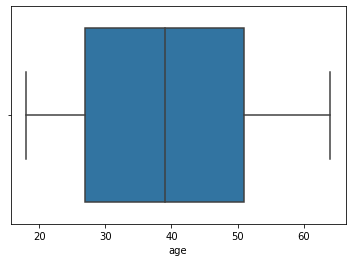

In [89]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='children'>

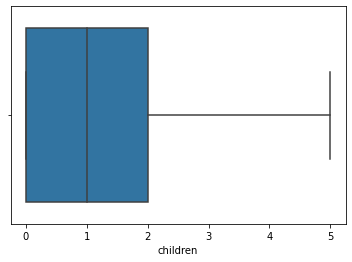

In [90]:
sns.boxplot(df['children'])

<AxesSubplot:xlabel='bmi'>

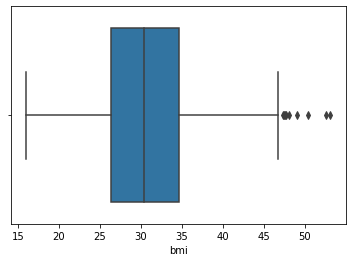

In [91]:
sns.boxplot(df['bmi'])

<AxesSubplot:xlabel='bmi'>

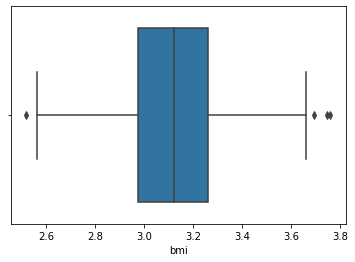

In [92]:
sns.boxplot(np.cbrt(df['bmi']))

In [93]:
from scipy.stats import zscore

<AxesSubplot:xlabel='bmi'>

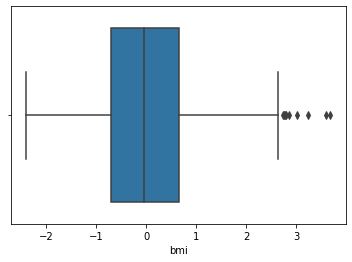

In [94]:
sns.boxplot(zscore(df['bmi']))

<AxesSubplot:xlabel='bmi'>

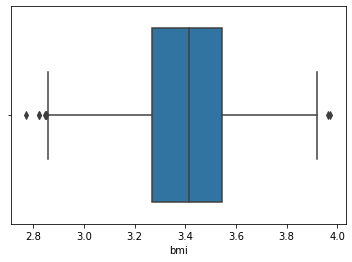

In [95]:
sns.boxplot(np.log(df['bmi']))

In [96]:
q1=df['bmi'].quantile(0.25)
q2=df['bmi'].quantile(0.50)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
upper_tail = q3+(1.5*iqr)
lower_tail = q1-(1.5*iqr)

print("Q1-->",q1)
print("Q2-->",q2)
print("Q3-->",q3)
print("IQR-->",iqr)
print("Upper_Tail-->",upper_tail)
print("Lower_Tail-->",lower_tail)

Q1--> 26.29625
Q2--> 30.4
Q3--> 34.69375
IQR--> 8.3975
Upper_Tail--> 47.290000000000006
Lower_Tail--> 13.7


In [97]:
df.loc[(df['bmi']>upper_tail) | (df['bmi']<lower_tail),'bmi']

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [98]:
median = df.loc[(df['bmi']<upper_tail) & (df['bmi']>lower_tail),'bmi'].median()
median

30.3

In [99]:
df.loc[(df['bmi']<upper_tail) & (df['bmi']>lower_tail),'bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1329, dtype: float64

In [100]:
df.loc[(df['bmi']>upper_tail) | (df['bmi']<lower_tail),'bmi'] = median

In [101]:
df.loc[(df['bmi']>upper_tail) | (df['bmi']<lower_tail),'bmi']

Series([], Name: bmi, dtype: float64)

### 5. Feature Selection

#### Checking linearity

In [102]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.114273,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.039736,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.114273,-0.039736,1.000000,0.017377,-0.002943,0.190559,-0.135819,-0.128304,0.253677,0.000733
children,0.042469,-0.017163,0.017377,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,-0.002943,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.190559,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.135819,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.128304,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.253677,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,0.000733,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

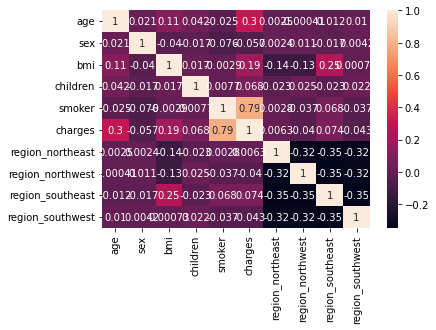

In [103]:
sns.heatmap(df.corr(),annot=True)

#### checking no-multi-collinearity

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

age                  1.017809
sex                  1.008336
bmi                  1.097621
children             1.004138
smoker               1.012255
region_northeast     9.087894
region_northwest     9.155919
region_southeast    12.033445
region_southwest     9.745596
dtype: float64

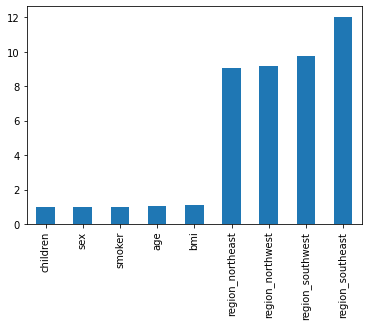

In [105]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind = 'bar')
s1

### Model Training

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x = df.drop('charges',axis=1)
y = df['charges']

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)


In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 9)
(268, 9)
(1070,)
(268,)


In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
LR = LinearRegression()
LR

LinearRegression()

In [112]:
LR.fit(x_train,y_train)

LinearRegression()

In [113]:
y_pred_train = LR.predict(x_train)
y_pred_train

array([10508.37786453,  8566.01182811,  4175.091383  , ...,
       37683.07977029, 29906.09729039, 11654.45028421])

In [114]:
y_pred_test = LR.predict(x_test)
y_pred_test

array([ 4.36869792e+03,  1.28870366e+04,  1.25927089e+04,  1.33699391e+04,
        6.13075071e+02,  3.21254074e+04,  1.30299572e+04,  1.23266962e+04,
        3.83134624e+03,  2.96540224e+04,  1.11605445e+04,  1.74601430e+04,
        8.81710820e+03,  8.35930937e+03,  3.26872844e+03,  1.04698251e+04,
        3.90851882e+03,  6.94966174e+03,  1.51050706e+04,  1.44369632e+04,
        1.25554966e+04,  3.30674870e+04,  9.06755881e+03,  9.03940128e+03,
        3.02558946e+03,  8.17666153e+03,  9.57856282e+03,  1.08600451e+04,
        7.68049356e+03,  4.42303459e+03,  1.41184914e+04,  5.85151952e+03,
        3.46863406e+04,  2.70466828e+04,  3.35182361e+04,  9.56917608e+03,
        3.04697023e+04,  2.67192481e+04,  1.52471947e+04,  3.39074503e+04,
        6.41104951e+03,  1.40476728e+04,  1.08385724e+04,  1.50861549e+04,
        4.21834470e+03,  1.31398189e+04,  4.46471015e+03,  2.87936797e+04,
        7.28391160e+03,  1.42532157e+04,  1.34323874e+04,  1.23301133e+04,
        1.89260210e+03,  

### 6.Model Evalution

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [116]:
residual_train = y_train-y_pred_train
residual_test = y_test - y_pred_test

In [117]:
mse_train = mean_squared_error(y_train,y_pred_train)
print("mse --->",mse_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
print("mae --->",mae_train)
r2 = r2_score(y_train,y_pred_train)
print("r2 --->",r2)

mse ---> 37111823.74668873
mae ---> 4162.136152214009
r2 ---> 0.7455461299280555


In [118]:
mse_test = mean_squared_error(y_test,y_pred_test)
print("mse --->",mse_test)
mae_test = mean_absolute_error(y_test,y_pred_test)
print("mae --->",mae_test)
r2 = r2_score(y_test,y_pred_test)
print("r2 --->",r2)

mse ---> 35304877.56088338
mae ---> 4040.1112790344278
r2 ---> 0.7634999578439541


#### checking normality of residuals

<AxesSubplot:xlabel='charges', ylabel='Density'>

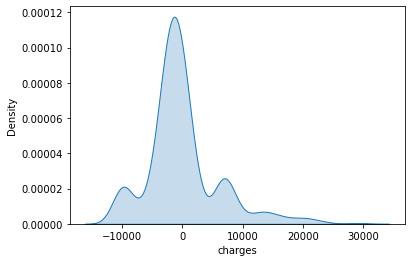

In [119]:
sns.kdeplot(residual_train,fill=True)

<AxesSubplot:xlabel='charges', ylabel='Density'>

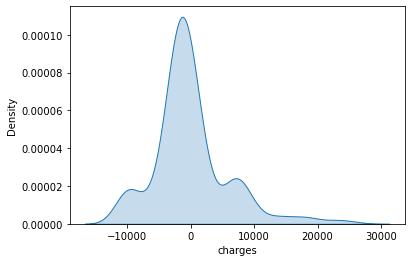

In [120]:
sns.kdeplot(residual_test,fill=True)

#### checking homoscedasticity

<AxesSubplot:ylabel='charges'>

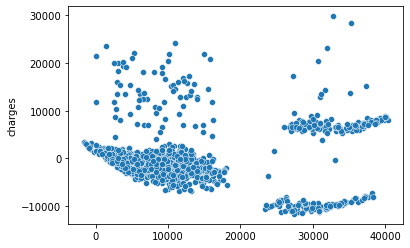

In [121]:
sns.scatterplot(x=y_pred_train,y=residual_train)

<AxesSubplot:ylabel='charges'>

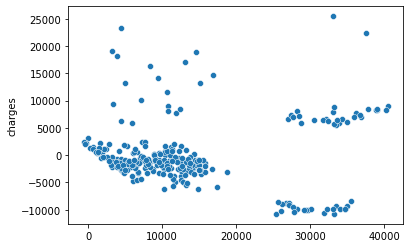

In [122]:
sns.scatterplot(x=y_pred_test,y=residual_test)

## Ceation of json and pickle files

In [123]:
dict_sex = {'male': 0, 'female': 1}
dict_sex

{'male': 0, 'female': 1}

In [124]:
dict_smoker = {'no': 0, 'yes': 1}
dict_smoker

{'no': 0, 'yes': 1}

In [125]:
x.columns.tolist()

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [126]:
project_dict = {'dict_sex':dict_sex,'dict_smoker':dict_smoker,
               'column_dict':x.columns.tolist()}
project_dict

{'dict_sex': {'male': 0, 'female': 1},
 'dict_smoker': {'no': 0, 'yes': 1},
 'column_dict': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [127]:
import json
with open("project_dict.json",'w') as f:
    json.dump(project_dict,f)

In [128]:
import pickle
with open("insurance_model.pkl",'wb') as f:
    pickle.dump(LR,f)
    